This notebook will explore what a Confusion Matrix is and why it is useful. We will pay particular attention to when a confusion matrix becomes vital for understanding ML Algo's (e.g. 3 or more classifiers / uneven number of classifiers)

A confusion matrix will provide more detailed information than a just an accuracy score!

It provides a summary of prediction results.

Definition: The confusion matrix shows the ways in which your classification model is confused when it makes predictions - hence why it is called a classification matrix.

Expected (actual classes) are represented on the side and Predicted classes are represented at the top.

The total number of correct predictions for a class go into the expected row for that class value and the predicted column for that class value.

In the same way, the total number of incorrect predictions for a class go into the expected row for that class value and the predicted column for that class value.

A quote from "An introduction to Statistical learning" will help summarize this idea:

"In practice, a binary classifier such as this one can make two types of errors: it can incorrectly assign an individual who defaults to the no default category, or it can incorrectly assign an individual who does not default to the default category. It is often of interest to determine which of these two types of errors are being made. A confusion matrix […] is a convenient way to display this information."

Below is a construction of a confusion matrix

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

In [3]:
expected = pd.Series([1, 1, 0, 1, 0, 0, 1, 0, 0, 0], name='Actual')
actual = pd.Series([1, 0, 0, 1, 0, 0, 1, 1, 1, 0], name='Predicted')

In [4]:
df_confusion = pd.crosstab(expected, actual, rownames=['Actual'], colnames=['Predicted'], margins=True)

In [5]:
df_confusion

Predicted,0,1,All
Actual,,,
0,4,2,6
1,1,3,4
All,5,5,10


Below is a very simple plot of the consfusion matrix

In [10]:
# def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
#     plt.matshow(df_confusion, cmap=cmap) # imshow
# #     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(df_confusion.columns))
#     plt.xticks(tick_marks, df_confusion.columns, rotation=45)
#     plt.yticks(tick_marks, df_confusion.index)
# #     plt.tight_layout()
#     plt.ylabel(df_confusion.index.name)
#     plt.xlabel(df_confusion.columns.name)
#     plt.show()


In [11]:
# plot_confusion_matrix(df_confusion)

This is a more sophisticated plot.

In [8]:
#obtained form SciKit-lern documentation
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
y_test = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
y_pred = [1, 0, 0, 1, 0, 0, 1, 1, 1, 0]

Confusion matrix, without normalization
[[4 2]
 [1 3]]


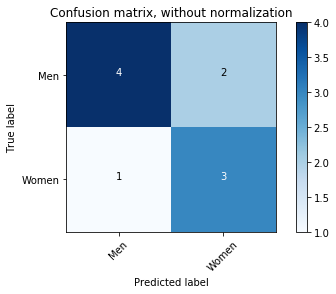

Normalized confusion matrix
[[ 0.67  0.33]
 [ 0.25  0.75]]


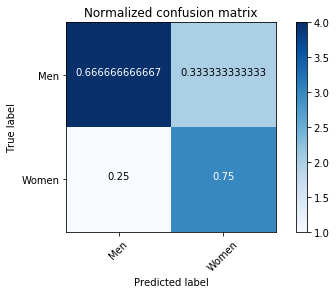

In [12]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred) #note how the order of entries matter. Can also take a pandas series!
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=["Men", "Women"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=["Men", "Women"], normalize=True,
                      title='Normalized confusion matrix')
